In [2]:
import numpy as np
import pandas as pd
# Importo OS solo para ver la lista de archivos de data
import os
import plotly.express as px

import seaborn as sns
import folium
from folium import plugins

import matplotlib.pyplot as plt 
import matplotlib.patches as patches 

In [3]:
#Primero voy a importar toda la data de los índices y lo voy a guardar en un diccionario separando los índices y en un mismo dataframe
lista_indices = os.listdir("./data")[1:]
lista_indices
df = pd.read_csv(f"./data/{lista_indices[0]}/{lista_indices[0]}.csv")
dict_indices = {lista_indices[0]:pd.read_csv(f"./data/{lista_indices[0]}/{lista_indices[0]}.csv")}

for indice in lista_indices[1:]:

    if indice == "lista_indices_paises.csv": continue

    df2= pd.read_csv(f"./data/{indice}/{indice}.csv")

    if df2.shape[0] < 800:
        continue

    dict_indices[indice] = df2.copy()
    

    df = pd.concat([df, df2], axis = 0)

df.reset_index(inplace=True)
print(df.shape)
df.head(3)

(30101, 8)


,index,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen
0,0,08 ene 2024,342975,343134,340130,342555,342555,2.979.300
1,1,05 ene 2024,341714,343637,338376,343008,343008,3.009.000
2,2,04 ene 2024,337798,342017,337672,342017,342017,2.388.200


In [12]:
dict_indices["ATX"].head(3)

,Fecha,Apertura,Max,Min,Cierre,Volumen,Indice,Cambio,Cambio%,weekday,month,year
0,2024-01-08,3429.75,3431.34,3401.30,3425.55,2979300.0,ATX,-4.20,-0.122,Monday,January,2024
1,2024-01-05,3417.14,3436.37,3383.76,3430.08,3009000.0,ATX,12.94,0.379,Friday,January,2024
2,2024-01-04,3377.98,3420.17,3376.72,3420.17,2388200.0,ATX,42.19,1.249,Thursday,January,2024


In [13]:
#Cargo los datos de todas las acciones, en un dataframe con todo y en un diccionario separando los índices y las acciones
lista_carpetas_archivos = {carpeta.split("\\")[-1]:file for carpeta, subcarpeta, file in os.walk("./data") if file!=[]}
lista_carpetas_archivos

columns = ['Fecha', 'Apertura', 'Max', 'Min', 'Cierre', 'Volumen','Indice', 'weekday', 'month', 'year', 'Accion']

df_acciones = pd.DataFrame(columns=columns)
dict_acciones = {}

for indice in lista_carpetas_archivos.keys():

    print(indice)

    for archivo in lista_carpetas_archivos[indice]:

        if archivo.find("accion") == -1:
            continue

        df2= pd.read_csv(f"./data/{indice}/{archivo}")

        accion = archivo.split(".csv")[0].split("_")[-1]

        if df2.shape[0] < 800 or accion in df_acciones["Accion"].tolist():
            continue


        df2["Accion"] = np.full(df2.shape[0], fill_value=accion)

        try:
            
            dict_acciones[indice][accion]= df2.copy()
        
        except:
            
            dict_acciones[indice] = {}
            dict_acciones[indice][accion]= df2.copy()

        df_acciones = pd.concat([df_acciones, df2], axis = 0)

df_acciones.reset_index(inplace=True)
print(df_acciones.shape)
df_acciones.head(3)

./data
Airtable
ATX
BFX
BVSP
CASE30
DJI
FCHI
GDAXI
GSPC
HSI
IBEX
INDC.MC
INDD.MC
INDS.MC
IPSA
IXIC
JKSE
JN0U.JO
KS11
MXX
N100
N225
NZ50
OMXC20
OMXSPI
OSEAX
SSMI
STOXX50E
TA125.TA
TWII
(392232, 14)


,index,Fecha,Apertura,Max,Min,Cierre,Volumen,Indice,weekday,month,year,Accion,Cambio,Cambio%
0,0,2024-01-08,53.60,54.25,53.25,54.15,48160.0,ATX,Monday,January,2024,ANDR.VI,0.55,1.026
1,1,2024-01-05,53.65,53.65,52.75,53.50,70981.0,ATX,Friday,January,2024,ANDR.VI,-0.15,-0.280
2,2,2024-01-04,53.30,53.85,53.20,53.85,59921.0,ATX,Thursday,January,2024,ANDR.VI,0.55,1.032


In [14]:
dict_acciones["ATX"]["ANDR.VI"].head(3)

,Fecha,Apertura,Max,Min,Cierre,Volumen,Indice,Cambio,Cambio%,weekday,month,year,Accion
0,2024-01-08,53.60,54.25,53.25,54.15,48160.0,ATX,0.55,1.026,Monday,January,2024,ANDR.VI
1,2024-01-05,53.65,53.65,52.75,53.50,70981.0,ATX,-0.15,-0.280,Friday,January,2024,ANDR.VI
2,2024-01-04,53.30,53.85,53.20,53.85,59921.0,ATX,0.55,1.032,Thursday,January,2024,ANDR.VI


In [15]:
px.line(data_frame = df,
        x = "Fecha",
        y = "Cierre",
        color = "Indice")

C:\Users\ffzun\AppData\Local\Temp\ipykernel_21756\3088726743.py:62: UserWarning:

FixedFormatter should only be used together with FixedLocator



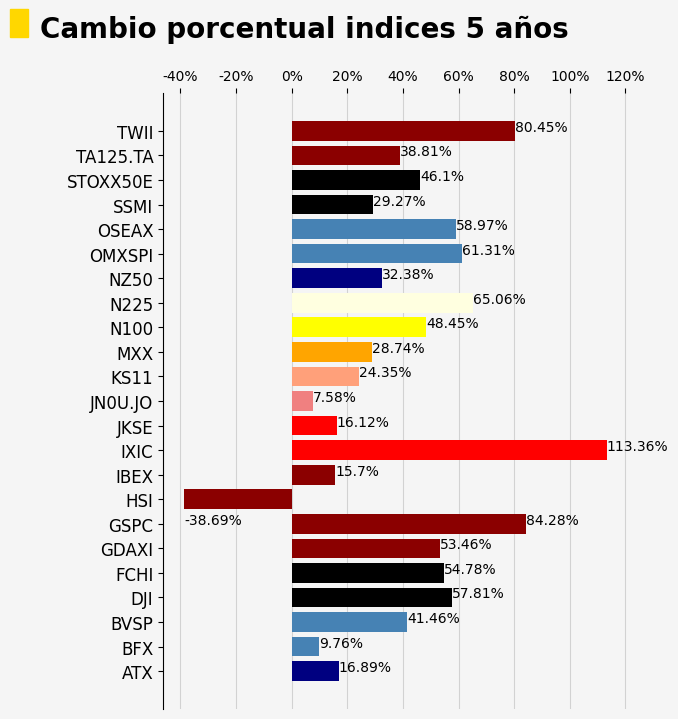

In [16]:
#Gráfico de barras en el que voy a mostrar el rendimiento de cada índice en los 5 años de datos
dict_cambio ={
    "Indice":[],
    "Cambio%":[]
}

for k,v in dict_indices.items():
    dict_cambio["Indice"].append(k)
     
    cambio = round((dict_indices[k].iloc[0]["Cierre"] - dict_indices[k].iloc[-1]["Cierre"]) * 100 / dict_indices[k].iloc[-1]["Cierre"],2)
    dict_cambio["Cambio%"].append(cambio)


fig, ax = plt.subplots(figsize=(6, 8))
# Colores para cada barra
colors = ['navy', 'steelblue', 'steelblue', 'black', 'black', 'darkred',
          'darkred', 'darkred', 'darkred', 'red', 'red', 'lightcoral', 'lightsalmon',
          'orange', 'yellow', 'lightyellow']

#Añado el fondo gris del gráfico
ax.set_facecolor('whitesmoke')
fig.set_facecolor('whitesmoke')

# Añado lineas verticales para visualizar mejor cada valor
ax.grid(linestyle='-', 
        alpha=0.5, 
        axis='x',
       )

# Titulo del gráfico
title = 'Cambio porcentual indices 5 años'
fig.text(-0.08, 0.95, # Posición
         title, 
         fontsize=20, 
         fontweight = 'bold',
         ha='left', #Alinear a la izquierda
         family='dejavu sans'
        )

# Añado rectángulo amarillo como componente estético
rectangle_color = 'gold'
rect = patches.Rectangle((-0.13, 0.95), 0.03, 0.035,
                         linewidth=1, edgecolor=rectangle_color,
                         facecolor=rectangle_color, transform=fig.transFigure)
fig.patches.append(rect)


ax.barh(dict_cambio['Indice'], dict_cambio['Cambio%'],
        color=colors, 
        zorder=2,
       )


# Elimino las lineas de los bordes del gráfico ya que había algunos datos que
# se superponían a estas y no quedaba bien
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Añado datos parte superior
ax.tick_params(axis='y', labelsize=12)
ax.set_xticklabels(['-100%', '-40%', '-20%', '0%', '20%', '40%', '60%',"80%","100%","120%"])
ax.xaxis.tick_top()



#Añado los valores al final de cada barra
for index, value in zip(dict_cambio['Indice'],dict_cambio['Cambio%']):
    
        if index =="HSI": 
                ax.text(value, "GSPC", str(value)+"%")
                continue
              

        ax.text(value, index, str(value)+"%")


plt.show()

In [17]:
#Comparo como se comportó cada indice por mes durantes estos 5 años
indices= ["DJI","N100","N225"]
fig = px.histogram(data_frame = df[(df["year"] != 2024)].groupby(["year","Indice"])["Cambio%"].agg("sum").reset_index().sort_values("year"),
             x          = "Indice",
             y          = "Cambio%", 
             hover_data = ["Cambio%"],
             color      = "Indice",
             nbins      = 200,
             marginal   = "rug",
             facet_row = "year")

fig.update_layout(
    title = "Variación de los índices por cada año",
    autosize=False,
    width=1000,
    height=1000,
    
)

fig.show()

In [18]:
#Comparo como se comportó cada indice por mes durantes estos 5 años
indices= ["DJI","N100","N225"]
fig = px.histogram(data_frame = df[df["Indice"].isin(indices)].groupby(["Indice","month"])["Cambio%"].agg("sum").reset_index().sort_values("Cambio%"),
             x          = "month",
             y          = "Cambio%", 
             hover_data = ["Cambio%"],
             color      = "Indice",
             nbins      = 200,
             marginal   = "rug",
             facet_row = "Indice")

fig.update_layout(
    title = "Suma variación por mes de los índices DJI, N100, N225",
    autosize=False,
    width=1000,
    height=1000,
)

fig.show()

In [19]:
indices= ["DJI","N100","N225"]

fig = px.box(data_frame = df.groupby(["Indice","year","month"])["Cambio%"].sum().sort_values().reset_index(),
       x          = "month",
       y          = "Cambio%",
#        color      = "Type 1",
#        facet_col  = "Generation",
       points     = "suspectedoutliers",
       hover_name = "year",
       title      = "Valores estadísticos para cada mes"
      )

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
)

fig.show()

In [20]:
import plotly.figure_factory as ff



x = np.random.randn(1000)
hist_data = [x]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot([df[df["Indice"]=="DJI"]["Cambio%"]], ["Cambio%"], bin_size=0.25)

atipicos_pos = df[df["Indice"]=="DJI"]["Cambio%"].mean() + 3 * df[df["Indice"]=="DJI"]["Cambio%"].std()
atipicos_neg = df[df["Indice"]=="DJI"]["Cambio%"].mean() - 3 * df[df["Indice"]=="DJI"]["Cambio%"].std()

fig.add_shape(type="line",
    x0=df[df["Indice"]=="DJI"]["Cambio%"].mean(), y0=0, x1=df[df["Indice"]=="DJI"]["Cambio%"].mean(), y1=0.65,
    line=dict(color="Red",width=1),
)

fig.add_shape(type="line",
    x0=df[df["Indice"]=="DJI"]["Cambio%"].quantile(0.75), y0=0, x1=df[df["Indice"]=="DJI"]["Cambio%"].quantile(0.75), y1=0.65,
    line=dict(color="Green",width=1),
)
fig.add_shape(type="line",
    x0=df[df["Indice"]=="DJI"]["Cambio%"].quantile(0.25), y0=0, x1=df[df["Indice"]=="DJI"]["Cambio%"].quantile(0.25), y1=0.65,
    line=dict(color="Green",width=1),
)

fig.add_shape(type="line",
    x0=atipicos_pos, y0=0, x1=atipicos_pos, y1=0.2,
    line=dict(color="Violet",width=1),
)

fig.add_shape(type="line",
    x0=atipicos_neg, y0=0, x1=atipicos_neg, y1=0.2,
    line=dict(color="Violet",width=1),
)


fig.update_layout(
    title="Distribución del % Cambio por día del indice DJI",
    autosize=False,
    width=1000,
    height=800,
    showlegend=False,
)
fig.show()

In [21]:
fig = px.box(data_frame = dict_indices["DJI"][dict_indices["DJI"]["weekday"] != "Sunday"],
       x          = "weekday",
       y          = "Cambio%",
#        color      = "Type 1",
#        facet_col  = "Generation",
       points     = "suspectedoutliers",
       hover_name = "Fecha",
       title      = "Valores cambio por dia semana para DJI"
      )

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
)

fig.show()

In [22]:
indice_1= "DJI"
indice_2= "N100"

fig = px.scatter(
           x           = dict_indices[indice_1][dict_indices[indice_1]["Fecha"].isin(dict_indices[indice_2]["Fecha"])]["Cambio%"],
           y           = dict_indices[indice_2][dict_indices[indice_2]["Fecha"].isin(dict_indices[indice_1]["Fecha"])]["Cambio%"],
           opacity     = 0.5,

           trendline="ols")

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

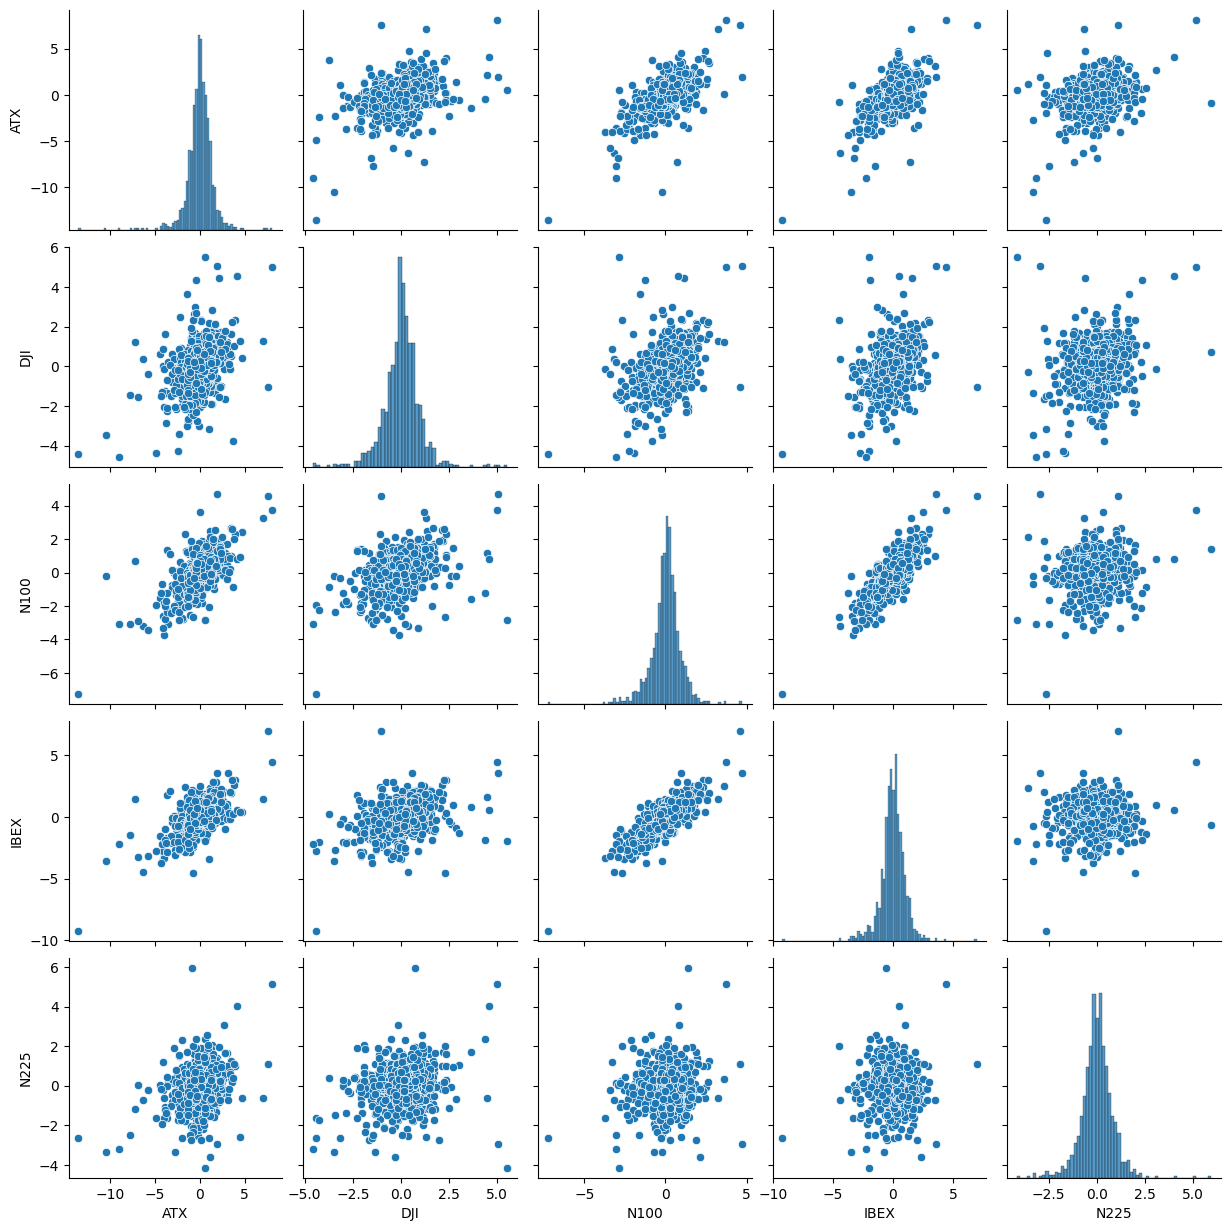

In [133]:
dict_cambio_indices = {}
indices = ["ATX","DJI","N100","IBEX","N225"]

df_fechas = df[df["Indice"].isin(indices)]["Fecha"].value_counts().reset_index()
df_fechas = df_fechas[df_fechas["Fecha"] == 5]
lista_fechas = sorted(df_fechas["index"].tolist(), reverse=True)


for indice in indices:

    dict_cambio_indices[indice] = dict_indices[indice][dict_indices[indice]["Fecha"].isin(lista_fechas)]["Cambio%"].tolist()

df_cambio_indices = pd.DataFrame(dict_cambio_indices, index=lista_fechas)

sns.pairplot(df_cambio_indices)
plt.show()

In [23]:
dict_cambio_indices = {}
indices = list(dict_indices.keys())[0:10]

df_fechas = df[df["Indice"].isin(indices)]["Fecha"].value_counts().reset_index()
df_fechas = df_fechas[df_fechas["Fecha"] == len(indices)]
lista_fechas = sorted(df_fechas["index"].tolist(), reverse=True)


for indice in indices:

    dict_cambio_indices[indice] = dict_indices[indice][dict_indices[indice]["Fecha"].isin(lista_fechas)]["Cambio%"].tolist()

df_cambio_indices = pd.DataFrame(dict_cambio_indices, index=lista_fechas)

fig = px.imshow(img       = df_cambio_indices.corr().round(2),
          text_auto = True)

fig.update_layout(
    title="Correlación de índices",
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [24]:
import plotly.graph_objects as go
plt.figure(figsize = (40, 8))
df_ITX = dict_acciones["IBEX"]["ITX.MC"][dict_acciones["IBEX"]["ITX.MC"]["year"] == 2023]

fig = go.Figure(data=[go.Candlestick(x=df_ITX["Fecha"],
                open=df_ITX['Apertura'],
                high=df_ITX['Max'],
                low=df_ITX['Min'],
                close=df_ITX['Cierre'])])

fig.update_layout(
    title="Gráfico de velas para Inditex",
    autosize=False,
    width=800,
    height=800,
)

fig.show()

<Figure size 4000x800 with 0 Axes>

In [25]:
df_n100 = df_acciones[df_acciones["Indice"] == "N100"]
df_n100.loc[:,"Pais"] = df_n100.loc[:,"Accion"].apply(lambda x : x.split(".")[-1])
df_n100.loc[:,"Accion"] = df_n100.loc[:,"Accion"].apply(lambda x : x.split(".")[0])


fig = px.sunburst(data_frame = df_n100,
                  values     = np.full(df_acciones[df_acciones["Indice"] == "N100"].shape[0], fill_value= 1),
                  path       = ["Pais","Accion"],
                  hover_name = "Accion")

fig.update_traces(textinfo = "label+percent parent")

fig.update_layout(
    title="Componentes N100 por pais",
    autosize=False,
    width=800,
    height=800,
)
fig

In [26]:
# Airbnb - Mismos parámetros de sunburst
df_groupby_acciones = df_acciones.groupby(["Indice","Accion"])["Cambio%"].sum().reset_index()

df_ganadores = df_groupby_acciones[df_groupby_acciones["Cambio%"] > 0]

fig = px.treemap(data_frame = df_ganadores,
           values     = "Cambio%",
           path       = ["Indice", "Accion"],
           hover_name = "Accion",
           color      = "Accion")

fig.update_layout(
    title="Acciones ganadoras por indice",
    autosize=False,
    width=800,
    height=800,
)

fig.update_traces(root_color="lightgrey")
fig.show()


df_perdedores = df_groupby_acciones[df_groupby_acciones["Cambio%"] < 0]
df_perdedores["Cambio%"] = df_perdedores["Cambio%"].map(lambda x : abs(x))

fig = px.treemap(data_frame = df_perdedores,
           values     = "Cambio%",
           path       = ["Indice", "Accion"],
           hover_name = "Accion",
           color      = "Accion")

fig.update_layout(
    title="Acciones perdedoras por indice",
    autosize=False,
    width=800,
    height=800,
)
fig.update_traces(root_color="lightgrey")
fig.show()

In [27]:
dfviolin = dict_acciones["IBEX"]["IBE.MC"]
dfviolin2 = dict_acciones["IBEX"]["ENG.MC"]
dfviolin3 = dict_acciones["IBEX"]["ELE.MC"]
dfviolincompa = pd.concat([dfviolin, dfviolin2, dfviolin3], axis=0, ignore_index=False)
fig = px.violin(data_frame = dfviolincompa.sort_values("Cambio%"),
          x          = "month",
          y          = "Cambio%",
          color      = "Accion",
          hover_name = "Volumen",
          title      = "Variacion de porcentaje de las acciones de IBERDROLA, ENAGAS y ENDESA",

          )

fig.update_layout(
    title="Comparación acciones energéticas",
    autosize=False,
    width=1400,
    height=800,
)
fig.show()


In [4]:
# Crea df de CSV con los paises de los índices y sus coordenadas
df_paises_indices = pd.read_csv("./data/lista_indices_paises.csv")
print(df_paises_indices.shape)
df_paises_indices.head(3)

(33, 4)


,Índice,Pais,Longitud,Latitud
0,IBEX,España,-3.70256,40.41667
1,GSPC,Estados Unidos,-77.03694,38.89766
2,DJI,Estados Unidos,-77.03694,38.89766


In [5]:
# iniciliza mapa mundial
Mapa_indices = folium.Map(location=[0, 0], zoom_start = 2, tiles = "CartoDB Positron")

# Creo un mapa con MarkerCluster que ubica los indices en sus paises
indices = plugins.MarkerCluster()

for lat, lon, indice, in zip(df_paises_indices["Latitud"], df_paises_indices["Longitud"], df_paises_indices["Índice"]):
    
    indices.add_child(folium.Marker(location = [lat, lon],
                                    icon = folium.Icon(icon = "fa-money", icon_color = "white", color = "green", prefix = "fa"),
                                    popup = indice))
                      
Mapa_indices.add_child(indices)

Mapa_indices